# Regression 2 : Understanding Bias/Variance trade-off

## Overview

In Machine Learning, we are trying to mimic the system that is generating the data as best as we can. Unless it is a very simple sytem, most likely we would still only get an imperfect model regardless of how many experiments we try. One of the more common challenges for someone new to Machine Learning is how to select the best model during this experimentation process.

Let's begin by looking at the prediction error. This is the error between the values generated by our model and the actual outcome values from the system. This error can be expressed simplistically in the formula below (the actual form of the error composition is dependent on the error calculated).

$$Total Error = Bias Error + Variance Error + Irreducible Error$$

In this lesson, we will focus on the bias & variance error.

According to [this](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) Wikipedia entry, **Bias Error** is the error from the errorneous assumptions of the learning algorithm. Whereas **Variance Error** is the error from sensitivity to small fluctuations in the training set.

In building models, these 2 errors are in direct conflict with each other that is, minimizing the bias error will increase the variance error and vice versa. In trying to optimize our model and minimizing the overall error, we are always fighting to balance between the 2. 

A model with high bias and low variance typically correspond to *underfitting* i.e. a model that doesn't not perform well even on training data. However it should give similar models for two randomly chosen training datasets. 

On the other hand, *overfitting* is where the model performs very well on the training data but produces poor results on new data. This type of model is typically characterized by high variance and low bias since any two training datasets would lead to very different models.

Let's see how this idea applies in the model building process.

## Exercise
We start by importing the libraries needed for this lesson.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

We then define a shortcut function to help build a polynomial regression model.

In [3]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Let us load the housing dataset and check that the data is consistent as in previous lessons.

In [5]:
file_path = "../data/raw/train.csv"
input_data = pd.read_csv(file_path, index_col=0)

In [6]:
input_data.head() # check that the first few rows are the same as before

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
input_data.shape # check that the overall dataset size is the same

(1460, 80)

To help us illustrate our concepts, let's filter the dataset down to make things simpler. Here, we select only 2 columns and keep only 10 samples.

In [8]:
features = ['OverallQual','SalePrice']
data = input_data[features].sample(n=10, random_state=42)
data.columns = ['X','Y'] # rename the columns to make it easier to reference

In [9]:
data

,X,Y
Id,,
893,6,154500
1106,8,325000
414,5,115000
523,6,159000
1037,9,315500
615,4,75500
219,7,311500
1161,6,146000
650,4,84500


Display a scatter plot to visualize our data.

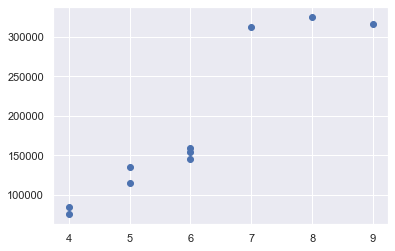

In [10]:
plt.scatter(data.X, data.Y)

Next, we build 2 models: A polynomial of degree 1 (i.e. a Linear Regression) and another of degree 20. We plot the models side-by-side so that we are able to visualize how they look with our data points.

In [11]:
X = data.X.values.reshape(-1,1)
y = data.Y.values

# Here we define 2 models: Linear and a higher order polynomial
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

In [12]:
# xfit is a series of generated x-axis values within the range. This will allow us to plot a smooth function on the graph to represent the model.
xfit = np.linspace(X.min(), X.max(), 100)[:, None]

<Figure size 432x288 with 0 Axes>

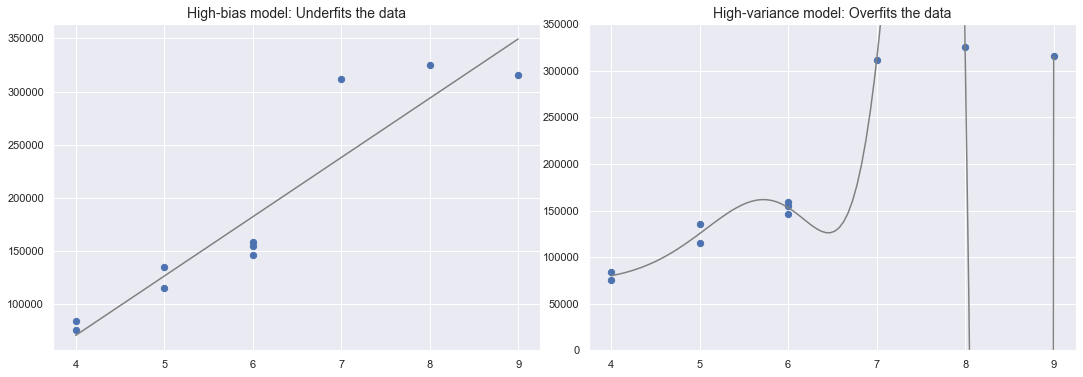

In [13]:
# We plot the results of the 2 models side by side
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Left subplot
ax[0].scatter(X, y, s=40)
ax[0].plot(xfit, model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Underfits the data', size=14)

# Right subplot
ax[1].scatter(X, y, s=40)
ax[1].plot(xfit, model20.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].set_ylim(0,350000) # Set the y axis limit, comment out to see the full picture of the model
plt.show()

Notice how the high-variance (overfitted) model passes close to or even through the data points in our training dataset.

Let's take a look at the training data errors. For this we consider the 2 common regression errors that we have used in the previous lesson i.e. Root Means Square Error (RMSE) and the Coefficient of Determination (R<sup>2</sup>)

In [14]:
# Calculate the 2 error metrics using both lower and higher order polynomials.
model1_rmse = np.sqrt(mean_squared_error(y, model1.predict(X)))
model1_r2 = r2_score(y, model1.predict(X))
print("Lower Order Model Errors, RMSE = {:.5}, R2 = {:.5}".format(model1_rmse, model1_r2))

model20_rmse = np.sqrt(mean_squared_error(y, model20.predict(X)))
model20_r2 = r2_score(y, model20.predict(X))
print("Higher Order Model Errors, RMSE = {:.5}, R2 = {:.5}".format(model20_rmse, model20_r2))

Lower Order Model Errors, RMSE = 3.2534e+04, R2 = 0.87566
Higher Order Model Errors, RMSE = 5812.0, R2 = 0.99603


As expected, the higher order model gives an almost perfect fit and a very small error on the training datasets.

Let's try our models on some unseen data. We sample the original dataset again taking note to take only datapoints within the same range as our training data. We then recalculate the metrics again.

In [18]:
# Sampling new data points from the original dataset. These points must be within the same range as the training data to be a fair comparison.
tmp_data = input_data[features]
tmp_data.columns = ['X','Y']
tmp_data = tmp_data[(tmp_data.X > X.min()) & (tmp_data.X < X.max()) & (tmp_data.Y > y.min()) & (tmp_data.Y < y.max())].sample(n=5, random_state=42)

In [19]:
model1_rmse_test = np.sqrt(mean_squared_error(tmp_data.Y, model1.predict(tmp_data.X.values.reshape(-1,1))))
model1_r2_test = r2_score(tmp_data.Y, model1.predict(tmp_data.X.values.reshape(-1,1)))
print("Lower Order Model Errors, RMSE = {:.5}, R2 = {:.5}".format(model1_rmse_test, model1_r2_test))

model20_rmse_test = np.sqrt(mean_squared_error(tmp_data.Y, model20.predict(tmp_data.X.values.reshape(-1,1))))
model20_r2_test = r2_score(tmp_data.Y, model20.predict(tmp_data.X.values.reshape(-1,1)))
print("Higher Order Model Errors, RMSE = {:.5}, R2 = {:.5}".format(model20_rmse_test, model20_r2_test))

Lower Order Model Errors, RMSE = 5.0556e+04, R2 = -0.878
Higher Order Model Errors, RMSE = 9.3036e+04, R2 = -5.3599


Both of our models give poor results when using the test data as shown by the negative R<sup>2</sup> score. However, note how much worse the higher order model is relative to the training dataset results. The rmse is of one order higher and the R<sup>2</sup> score is much worse. This is a classical indicator of an overfitted model. We can visually confirm the results by adding test data points to the plots.

<Figure size 432x288 with 0 Axes>

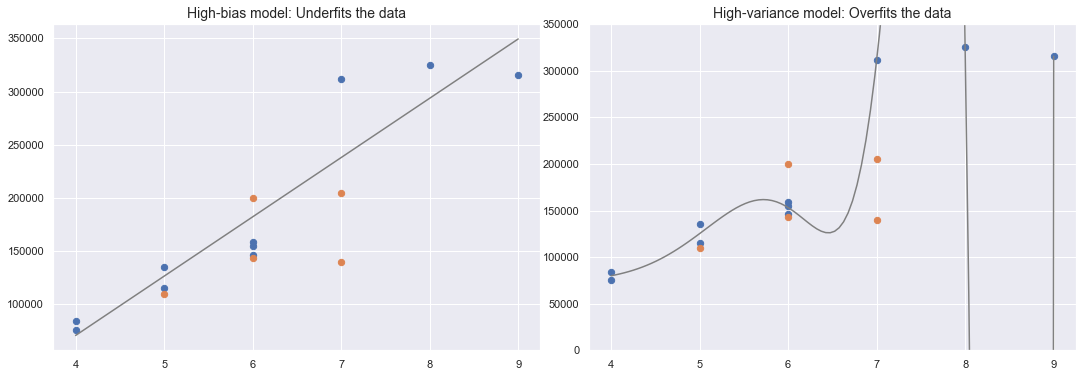

In [17]:
# We plot the results of the 2 models side by side
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Left subplot
ax[0].scatter(X, y, s=40)
ax[0].scatter(tmp_data.X, tmp_data.Y, s=40)

ax[0].plot(xfit, model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Underfits the data', size=14)

# Right subplot
ax[1].scatter(X, y, s=40)
ax[1].scatter(tmp_data.X, tmp_data.Y, s=40)
ax[1].plot(xfit, model20.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].set_ylim(0, 350000)
plt.show()

Therefore, it is not surprising that the best model in this simple exercise is somewhere in between the 2. So how do we tune this hyperparameter (polynomial order) so that we obtain the best model?

We can try replicate our steps above by fitting multiple models and calculating the errors for each of them. Let's visualize the polynomials against our training data for a few values of the hyperparameter. 

<Figure size 432x288 with 0 Axes>

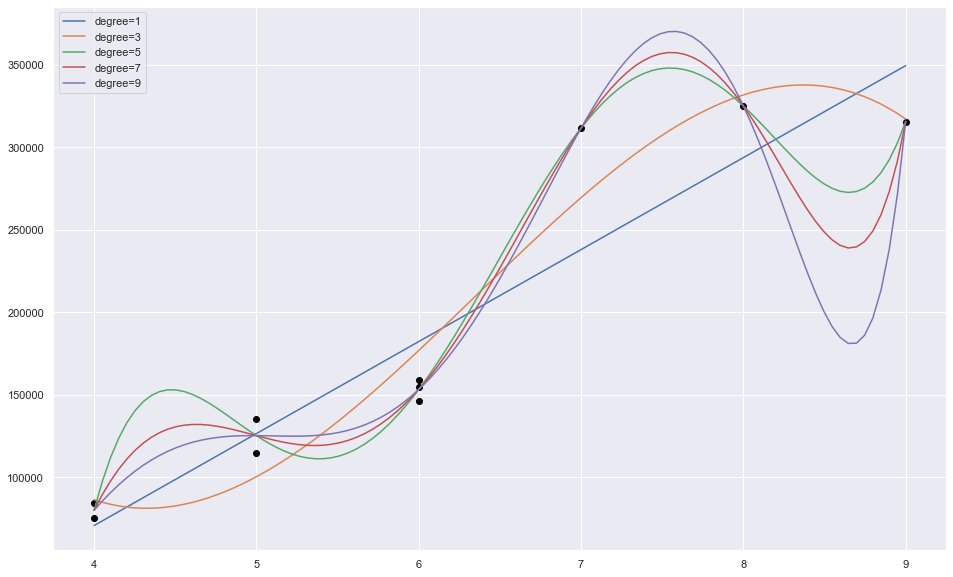

In [20]:
plt.clf()
plt.figure(figsize=(16,10))
plt.scatter(X, y, color='black')
axis = plt.axis()
for degree in range(1,10,2):
    y_test = PolynomialRegression(degree).fit(X, y).predict(xfit)
    plt.plot(xfit, y_test, label='degree={0}'.format(degree))
plt.legend(loc='best');
plt.show()

However, this is not the most efficient way to do this. We also want to minimize the exposure of the model to the test data so as to minimize accidentally introducing any bias. 

Fortunately, scikit has a solution for us! The <code>validation_curve</code> function uses cross-validation on the training dataset to calculate metrics on a training and validation set. We can then visualize this to help us identify the best possible values.

The next code block shows how to use this function. We have resampled a larger quantity of data to make the calculation more stable.

Note how the validation scores increase in line with the training score then drops off abruptly as the model starts to overfit the data.

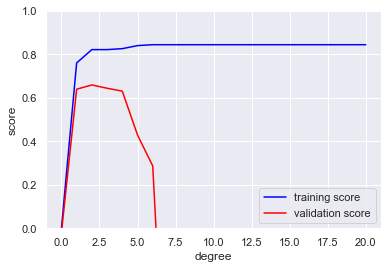

In [21]:
from sklearn.model_selection import validation_curve

data = input_data[features].sample(n=50, random_state=42)
data.columns = ['X','Y']
X = data.X.values.reshape(-1,1)
y = data.Y.values

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Now that you understand the concept behind bias-variance tradeoff, you should be able to take this into account when you are building your models. Happy Experimenting!